In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_2P3R,Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, get_shortest_path

In [2]:
# ROBOT
robot1 = Robot_2P3R([1, 1, 2, 1.2, 1])
robot1.set_joint_limits([(0.0, 1.0), (0.0, 3.0)])
robot1.ik_samples = [3, 5]

# PATH
dx    = TolerancedNumber(0.5, 0.3, 0.8, samples=4)
dy    = np.linspace(2, 2.5, 5)
angle = TolerancedNumber(0.0, -np.pi, 0, samples=10)
path1 = [TrajectoryPt([dx, yi, angle]) for yi in dy]

# COLLISION SCENE
sc1 = [Rectangle(1, 1, 1, 1.5, 0),
       Rectangle(3, 1, 1, 2.2, 0),
       Rectangle(0, 3.2, 4, 0.5, 0),
       Rectangle(0, 1, 0.2, 3.2, 0),
       Rectangle(0.2, 1, 0.8, 0.5, 0)]

In [3]:
from ppr.sampling import iterative_bfs

In [4]:
sol = iterative_bfs(robot1, path1, sc1, tol=1e-6, red=3, max_iter=10)

converting type of Q
[0 0 0 4 6]
converting type of Q
[ 3 11 44 61 17]
converting type of Q
[ 12 110  29 114 224]
converting type of Q
[ 17 231 363  60 255]
converting type of Q
[ 13 435 306 194 329]
converting type of Q
[293 533 533  89  89]
converting type of Q
[ 43 526 525  76 526]
converting type of Q
[ 57 531 532  80 230]
converting type of Q
[ 73 511 510  69 219]
converting type of Q
[ 72 512 510  72 539]


False


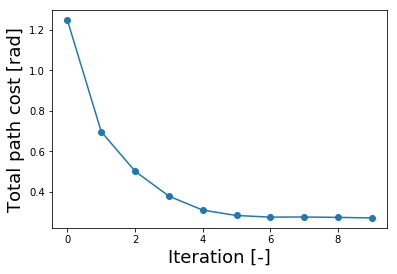

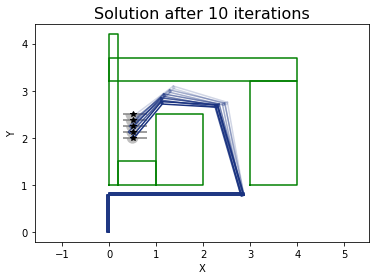

In [9]:
print(sol['success'])

plt.plot(sol['length_all_iterations'], 'o-')
plt.xlabel("Iteration [-]", fontsize=18)
plt.ylabel("Total path cost [rad]", fontsize=18)
plt.show()

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
    
plt.title("Solution after 10 iterations", fontsize=16)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# compare with optimisation based approach

In [6]:
# set mass, cg-positoin and mass moment of inertia for each link
robot1.set_link_inertia([1, 1, 1, 0.5, 0.5],
                        [0.5, 0.5, 0.25, 0.25, 0.15],
                        [0.05, 0.05, 0.05, 0.05, 0.05])

# use the sampling based solution as initial guess
q_init = sol['path']

In [7]:
from ppr.optim import get_optimal_trajectory

q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init,
                                               check_collision=True, scene=sc1)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.21890598747674717
            Iterations: 101
            Function evaluations: 2899
            Gradient evaluations: 100


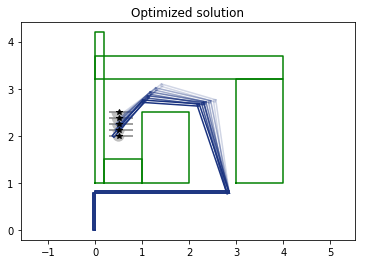

In [8]:
fig4, ax4 = plt.subplots()
plt.title("Optimized solution")
ax4.axis('equal')
robot1.plot_path(ax4, q_opt)
for tp in path1: tp.plot(ax4)
for r in sc1: r.plot(ax4, 'g')
plt.show()

In [9]:
np.sum(np.abs(np.diff(q_opt, axis=0)))

0.21890598747674717

In [10]:
np.sum(np.abs(np.diff(sol['path'], axis=0)))

0.27011966705322266